# The Most Successful Disney Movies and How the Studio Tells Stories
## (CSC 245 Final Project) <br/>

### __Background:__ 
Walt Disney Studios is one of the most successful film and television studios of all time. With a massive library of over 500 productions, acquiring properties from Marvel and 20th Century Fox, and with the potential of reaching its 100th anniversary in the next decade, there’s no doubt that they left a lasting legacy. While the company is known for its mark of quality, the films it produced are so engrained in (western) culture, that people often find themselves comparing the elements of successful films to some other Disney property. But what exactly is this mark of quality? By using data of the gross income of 579 Disney movies, it is possible to highlight the studio’s greatest strengths. 


Dataset Source: https://www.kaggle.com/rashikrahmanpritom/disney-movies-19372016-total-gross  

### Important Notes about Data: <br />
- The data used for this project includes all of the movies released by Disney, meaning not all of them were developed squarely in their own studios and could have been joint ventures, such as the many movies they made with Pixar. This does not make them insignificant however, as they were still part of company, and so, reflect at least some part of what they would deem worthy of their involvement. <br />
- The data also does not include movies that were merely acquired after their purchase of Marvel and 20th Century Fox.  <br />
- The data ranges from the years 1937 to 2016. The Disney “Eras” are periods of time which how the company’s storytelling changed that fans and historians generally agree upon. Therefore, they are not divided evenly or follow specific eras in American history. The eras are dated as the follows: <br />
    - 1937-1942 The Golden Age <br />
    - 1943-1949 The Wartime Era <br />
    - 1970-1988 The Bronze Age <br />
    - 1989-1999 The Disney Renaissance  <br />
    - 2000-2009 Post Renaissance Era <br /> 
    - 2010-2016 The Modern Era<br />


### Research Questions: 
My data analysis, as well as some background research aims to answer the following questions: <br />
- In terms of both audience reception and monetary success, what kinds of movies do they succeed the most with? Why is this interesting? Or in other words, what might this tell about Disney’s strengths in story-telling? 
- What Disney eras were the most successful? 
- What might the most successful eras reflect about American culture at the time? 


In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
disney = pd.read_csv('disney_movies_total_gross.csv')

In [3]:
disney.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,12/21/1937,Musical,G,184925485,5228953251
1,Pinocchio,2/9/1940,Adventure,G,84300000,2188229052
2,Fantasia,11/13/1940,Musical,G,83320000,2187090808
3,Song of the South,11/12/1946,Adventure,G,65000000,1078510579
4,Cinderella,2/15/1950,Drama,G,85000000,920608730


In [4]:
print(disney.size) #3474 
print(len(disney)) #579

3474
579


### Analysis Variables:  
All variables except genre and mpaa_rating are self-explanatory, however, genre varies from, a blank value. 
- movie_title
- release_date 
- genre (Musical, Adventure, Drama Comedy, Action, Horror, Romantic Comedy, Thriller/Suspense, Western, Black Comedy, Documentary and NaN)
- mpaa_rating* (G, PG, R, PG-13, Not Rated and NaN) 
- total_gross
- inflation_adjusted gross

*_mpaa stands for the Motion Picture Association of America. NC-17 or X ratings are possible ratings by the MPAA, but do not appear in this dataset._


In [5]:
pd.unique(disney['genre'])

array(['Musical', 'Adventure', 'Drama', 'Comedy', nan, 'Action', 'Horror',
       'Romantic Comedy', 'Thriller/Suspense', 'Western', 'Black Comedy',
       'Documentary', 'Concert/Performance'], dtype=object)

__mpaa_rating__ varies from G, PG, R, PG-13, Not Rated and NaN.

In [6]:
pd.unique(disney['mpaa_rating'])

array(['G', nan, 'Not Rated', 'PG', 'R', 'PG-13'], dtype=object)

## Data Cleaning:

A few small measures were made to clean the data before analysis. The following lists them in order based on the Jupyter notebook: 
1.	_release_date_ was changed from a string object to a datetime64 value. 
2.	All movies without genres were dropped. Since this was only 17 out of the 579 total movies (or ~2%) it was not a significant loss. Furthermore, there were also 56 movies that lacked ratings, however, since genres will be used to measure what kinds of movies Disney is most successful with, it was more important to keep. 
3.	Movies with a total gross of 0 were dropped since gross is integral to my measure of success for each era and genre.


In [7]:
#All datatypes seem to be correct, EXCEPT... 
#release_date should be in datetime format
disney.dtypes 


movie_title                 object
release_date                object
genre                       object
mpaa_rating                 object
total_gross                  int64
inflation_adjusted_gross     int64
dtype: object

In [8]:
#Dates are converted
disney['release_date']= pd.to_datetime(disney['release_date'],yearfirst=True,errors='coerce')
disney.dtypes

movie_title                         object
release_date                datetime64[ns]
genre                               object
mpaa_rating                         object
total_gross                          int64
inflation_adjusted_gross             int64
dtype: object

In [9]:
disney.isna().sum() 
#17 Movies lack genres.  
#Compared to the total 579, this is a very small amount (~2%) so they will be dropped 

#56 Movies lack ratings. 
#Ratings are telling property of a film, but not as important as genres 
#The unrrated movies will NOT be dropped, since genres are more important to consider for analysis


movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

About 40% of the movies without genres are also unrrated. <br />

In [10]:
disney[disney['genre'].isna()] 

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
22,Herbie Goes to Monte Carlo,1977-06-24,NaN,NaN,28000000,105847527
23,The Black Hole,1979-12-21,NaN,NaN,35841901,120377374
24,Midnight Madness,1980-02-08,NaN,NaN,2900000,9088096
25,The Last Flight of Noah’s Ark,1980-06-25,NaN,NaN,11000000,34472116
26,The Devil and Max Devlin,1981-01-01,NaN,NaN,16000000,48517980
121,Newsies,1992-04-08,NaN,PG,2706352,5497481
122,Passed Away,1992-04-24,NaN,PG-13,4030793,8187848
128,A Gun in Betty Lou's Handbag,1992-08-21,NaN,PG-13,3591460,7295423
146,Bound by Honor,1993-04-16,NaN,R,4496583,9156084


Two of the unrrated movies also have 0 as its value in total_gross and inflation_adjusted_gross. <br />
Only four movies in total lack this data. So they can safely be dropped.

In [11]:
no_gross = disney[disney['total_gross'] == 0] 
no_gross

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
20,The Many Adventures of Winnie the Pooh,1977-03-11,NaN,NaN,0,0
27,Amy,1981-03-20,Drama,NaN,0,0
29,Condorman,1981-08-07,Action,NaN,0,0
355,Frank McKlusky C.I.,2002-01-01,NaN,NaN,0,0


### (Dropping aforementioned values)

In [12]:
disney['genre'].dropna(inplace = True) 
disney.drop(no_gross.index, inplace = True)

In [13]:
disney[disney['genre'].isna()] 
disney[disney['total_gross'] == 0]  
#Empty dfs confirm successful drop

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross


## Analysis Summary: 
- Movies of the Golden era are most successful, however, the modern era is close behind
- Movies of the adventure genre are overwhelmingly more successful than any other genre, with Musicals right behind it.
- Musicals are the most successful genre in the golden era, but is just behind the Adventure movies of the modern era.  

## The most "successful" movies metric will be based on the top 20% most highest grossing movies. 
### These movies will be ordered by genre and era and have their totals compared to eachother.

First, we put the movies in descending order based on __inflation_adjusted_gross__

In [14]:
#Values are numerically sorted based on inflation_adjusted_gross
disney_order = disney.sort_values(by=['inflation_adjusted_gross'],ascending=False) 

#Index numbers are reset
disney_order = disney_order.reset_index(drop=False, inplace=False)

disney_order


,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
4,6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
...,...,...,...,...,...,...,...
570,280,An Alan Smithee Film: Burn Hollywood …,1998-02-27,Comedy,R,45779,82277
571,251,The War at Home,1996-11-20,NaN,R,34368,65543
572,502,Gedo Senki (Tales from Earthsea),2010-08-13,Adventure,PG-13,48658,51988
573,487,Walt and El Grupo,2009-09-10,Documentary,PG,20521,23064


We now take the 20% most successful movies

In [15]:
index_max = len(disney_order) * .20 
print(index_max) #The 115 highest grossing films are the most successful 
index_max = int(index_max) 


115.0


In [16]:
disney_success = disney_order[0:index_max] 
disney_success

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
4,6,Lady and the Tramp,1955-06-22,Drama,G,93600000,1236035515
...,...,...,...,...,...,...,...
110,226,Mr. Holland's Opus,1995-12-29,Drama,PG,82582604,157508868
111,207,While You Were Sleeping,1995-04-21,Romantic Comedy,PG,81057016,157082900
112,37,Splash,1984-03-09,Comedy,PG,62599495,157057661
113,462,Enchanted,2007-11-21,Romantic Comedy,PG,127706877,156074310


In [17]:
disney_success_order = disney_success.groupby(['genre']).count().sort_values(by=['inflation_adjusted_gross'],ascending=False) 

disney_success_order 
#(Later on, insert code to print first three rows)

,index,movie_title,release_date,mpaa_rating,total_gross,inflation_adjusted_gross
genre,,,,,,
Adventure,54,54,54,52,54,54
Comedy,23,23,23,22,23,23
Action,14,14,14,14,14,14
Drama,11,11,11,11,11,11
Musical,5,5,5,5,5,5
Romantic Comedy,4,4,4,4,4,4
Thriller/Suspense,4,4,4,4,4,4


Of the most successful movie genres, the three most abundant are Adventure, Comedy, and Action. <br /> 
Adventure holds a large majority over the other genres, being almost two times as abundant as its runner up: Comedy.

In [18]:
#Creating Era Conditions: 
import datetime 
# date and time in yyyy/mm/dd hh:mm:ss format 

#Adding extra column to designate eras: 
#disney_success['era'] = ' ' # 


#Ending dates are on New years eve!!
gold_start = datetime.datetime(1937, 1, 1, 0, 0, 0)  
gold_end = datetime.datetime(1942, 12, 31, 0, 0, 0) #Ending dates are on New years eve

war_start = datetime.datetime(1943, 1, 1, 0, 0, 0)  
war_end = datetime.datetime(1949, 12, 31, 0, 0, 0) #Ending dates are on New years eve

silver_start = datetime.datetime(1950, 1, 1, 0, 0, 0)  
silver_end = datetime.datetime(1969, 12, 31, 0, 0, 0) #Ending dates are on New years eve 

bronze_start = datetime.datetime(1970, 1, 1, 0, 0, 0)  
bronze_end = datetime.datetime(1988, 12, 31, 0, 0, 0) #Ending dates are on New years eve

ren_start = datetime.datetime(1989, 1, 1, 0, 0, 0)  
ren_end = datetime.datetime(1999, 12, 31, 0, 0, 0) #Ending dates are on New years eve

postren_start = datetime.datetime(2000, 1, 1, 0, 0, 0)  
postren_end = datetime.datetime(2009, 12, 31, 0, 0, 0) #Ending dates are on New years eve

modern_start = datetime.datetime(2010, 1, 1, 0, 0, 0)  
modern_end = datetime.datetime(2016, 12, 31, 0, 0, 0) #Ending dates are on New years eve

#Filting success by eras
#using the .copy() method prevents the changing of slices

golden_era_success = disney_success[(disney_success['release_date'] >= gold_start) 
                                    & (disney_success['release_date'] <= gold_end)].copy()
golden_era_success['era']= 'golden' 


war_era_success = disney_success[(disney_success['release_date'] >= war_start) 
                                    & (disney_success['release_date'] <= war_end)].copy()
war_era_success['era']= 'war' 


silver_era_success = disney_success[(disney_success['release_date'] >= silver_start) 
                                    & (disney_success['release_date'] <= silver_end)].copy()
silver_era_success['era']= 'silver'


bronze_era_success = disney_success[(disney_success['release_date'] >= bronze_start) 
                                    & (disney_success['release_date'] <= bronze_end)].copy()  
bronze_era_success['era']= 'bronze' 


ren_era_success = disney_success[(disney_success['release_date'] >= ren_start) 
                                    & (disney_success['release_date'] <= ren_end)].copy() 
ren_era_success['era']= 'ren'


postren_era_success = disney_success[(disney_success['release_date'] >= postren_start) 
                                    & (disney_success['release_date'] <= postren_end)].copy()  
postren_era_success['era']= 'postren'


modern_era_success = disney_success[(disney_success['release_date'] >= modern_start) 
                                    & (disney_success['release_date'] <= modern_end)].copy()  
modern_era_success['era']= 'modern'


print(len(golden_era_success)) 
print(len(war_era_success)) 
print(len(silver_era_success))
print(len(bronze_era_success))
print(len(ren_era_success)) 
print(len(postren_era_success)) 
print(len(modern_era_success))

#(Later on, program percentages of each era from disney_success)

3
1
6
8
36
29
32


The two most successful disney eras (using the  top 20% highest grossing movies when adjusted for inflation) are the Bronze and Renaissance eras. With the Renaissance being the most successful of the two. <br />  
Interestingly, none of the Post Renaissance or Modern era movies were the top 20% highest grossing.


In [19]:
#success_array = pd.DataFrame(success_array, data={})
success_array = golden_era_success.copy()


#Each era is appended to the array

#Golden era (already appended to success_array)
#success_array = np.append(success_array, golden_era_success, axis=0) 

#War era
success_array = np.append(success_array, war_era_success, axis=0) 

#Silver
success_array = np.append(success_array, silver_era_success, axis=0)

#Bronze
success_array = np.append(success_array, bronze_era_success, axis=0)

#Renaissance 
success_array = np.append(success_array, ren_era_success, axis=0)

#Post renaissance 
success_array = np.append(success_array, postren_era_success, axis=0) 

#Modern era 
success_array = np.append(success_array, modern_era_success, axis=0)

#An extra array is added to compensate for the indexes
success_df=pd.DataFrame(success_array, copy=True , columns =['index','movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross', 'era'] ) #corresponding columns added back to dataframe

#convert each column of success_df to correct datatype individually 
success_df = success_df.convert_dtypes(infer_objects=True, convert_string=True)
success_df.dtypes 



index                                Int64
movie_title                         string
release_date                datetime64[ns]
genre                               string
mpaa_rating                         string
total_gross                          Int64
inflation_adjusted_gross             Int64
era                                 string
dtype: object

In [20]:
success_by_gross_and_era = success_df.drop(['index','movie_title', 
                                          'release_date', 
                                         'mpaa_rating', 
                                          'total_gross','genre' 
                                         ], axis=1) 

#sns.catplot(x='era', y='inflation_adjusted_gross', data=success_by_gross_and_era, kind='bar') 
#plt.hist(success_by_gross_and_era['era']) 
#plt.hist(gross_and_era_sum)

#Display gross sums for each category 
gross_and_era_sum = success_by_gross_and_era.groupby('era', as_index=False).sum().sort_values(by=['inflation_adjusted_gross'],ascending=False) 

gross_and_era_sum

,era,inflation_adjusted_gross
2,modern,10548749153
4,ren,9661258485
1,golden,9604273111
3,postren,7853486758
5,silver,5147502144
0,bronze,1819153603
6,war,1078510579


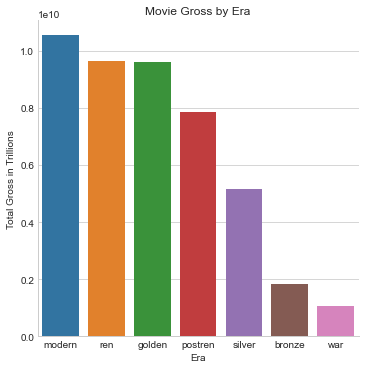

In [39]:
sns.catplot(x='era', y='inflation_adjusted_gross', data=gross_and_era_sum, kind='bar') 
plt.title('Movie Gross by Era')
plt.xlabel('Era')
plt.ylabel('Total Gross in Trillions')
plt.show()

In [22]:
golden_era_success.head() 

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,era
0,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251,golden
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,golden
2,2,Fantasia,1940-11-13,Musical,G,83320000,2187090808,golden


In [23]:
modern_era_success.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,era
6,564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225,modern
10,524,The Avengers,2012-05-04,Action,PG-13,623279547,660081224,modern
12,578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936,modern
15,571,Finding Dory,2016-06-17,Adventure,PG,486295561,486295561,modern
17,558,Avengers: Age of Ultron,2015-05-01,Action,PG-13,459005868,459005868,modern


The modern and renaissance eras are the most successful, with the golden era being slightly behind the renaissance. This is likely in part due to the aquisition of new intellectual properties and the production of new movies with said properties. The top four modern movies are films from the Star Wars and Avengers series.

In [24]:
success_by_gross_and_genre = success_df.drop(['index','movie_title', 
                                          'release_date', 
                                         'mpaa_rating', 
                                          'total_gross','era' 
                                         ], axis=1) 


gross_and_genre_sum = success_by_gross_and_genre.groupby('genre', as_index=False).sum().sort_values(by=['inflation_adjusted_gross'],ascending=False) 
gross_and_genre_sum



#sns.catplot(x='genre', y='inflation_adjusted_gross', data=success_by_gross_and_genre, kind='bar') 
#plt.hist(success_by_gross_and_genre['genre'])

,genre,inflation_adjusted_gross
1,Adventure,20251727541
4,Musical,8823835571
2,Comedy,6699667389
0,Action,4138175331
3,Drama,3795660149
6,Thriller/Suspense,1150032048
5,Romantic Comedy,853835804


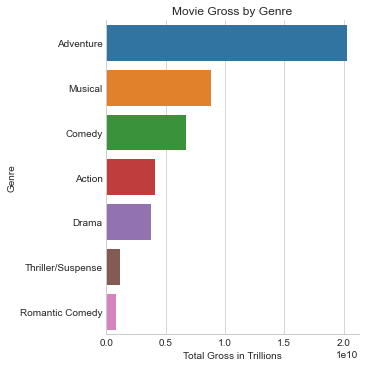

In [42]:
sns.catplot(x='inflation_adjusted_gross', y = 'genre', data=gross_and_genre_sum, kind='bar') #X and Y flipped for readibility
plt.title('Movie Gross by Genre') 
plt.xlabel('Total Gross in Trillions')
plt.ylabel('Genre')
plt.show()

In [26]:
adventure_success = disney_success[disney_success['genre'] == 'Adventure'] 
musical_success = disney_success[disney_success['genre'] == 'Musical']  
comedy_success = disney_success[disney_success['genre'] == 'Comedy']
action_success = disney_success[disney_success['genre'] == 'Action'] 

adventure_success.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
5,3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
6,564,Star Wars Ep. VII: The Force Awakens,2015-12-18,Adventure,PG-13,936662225,936662225
9,179,The Lion King,1994-06-15,Adventure,G,422780140,761640898
11,441,Pirates of the Caribbean: Dead Man’…,2006-07-07,Adventure,PG-13,423315812,544817142


In [27]:
musical_success.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
2,2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
8,13,The Jungle Book,1967-10-18,Musical,Not Rated,141843000,789612346
30,114,Beauty and the Beast,1991-11-13,Musical,G,218951625,363017667
60,15,The Aristocats,1970-04-24,Musical,G,55675257,255161499


In [28]:
comedy_success.head()

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
3,8,101 Dalmatians,1961-01-25,Comedy,G,153000000,1362870985
19,135,Aladdin,1992-11-11,Comedy,G,217350219,441969178
36,60,3 Men and a Baby,1987-11-25,Comedy,PG,167780960,353334607
41,66,Who Framed Roger Rabbit?,1988-06-22,Comedy,PG,154112492,316250084
42,440,Cars,2006-06-09,Comedy,G,244082982,314140384


In [29]:
golden_era_success[golden_era_success['genre'] == 'Adventure'] 

,index,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross,era
1,1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052,golden


In [30]:
golden_era_success.groupby('genre').sum()

,index,total_gross,inflation_adjusted_gross
genre,,,
Adventure,1,84300000,2188229052
Musical,2,268245485,7416044059


In [31]:
modern_era_success.groupby('genre').sum()

,index,total_gross,inflation_adjusted_gross
genre,,,
Action,3288,2339311157,2399470913
Adventure,12432,7381544796,7575599581
Drama,1602,553064913,573678659


Movies of the adventure genre are overwhelmingly more successful than any other genre. This is likely due to the abundance of Adventure films in the modern era, as both the golden and modern eras are comparable in terms of success, but the golden era has little adventure films

Despite Musicals being much less successful than Adventure films, it is overwhelmingly the most dominant successful genre in the golden era. 

Of the adventure films in the Golden and Modern eras, Modern era adventure films are the most successful, but not by a large margin.

In [32]:
#Putting a column called years in a copy of the original dataframe
disney_years = disney
disney_years['year'] = pd.DatetimeIndex(disney['release_date']).year 
disney_years

#Getting a dataframe of the gross for each unique year
yearly_gross_total = disney_years.groupby(['year']).sum()
yearly_gross_total.head() 


,total_gross,inflation_adjusted_gross
year,,
1937,184925485,5228953251
1940,167620000,4375319860
1946,65000000,1078510579
1950,85000000,920608730
1954,28200000,528279994


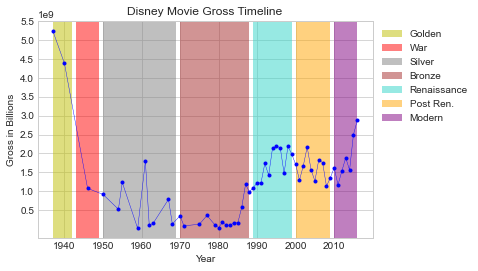

In [34]:
#Plot of the total gross of all the movies from each year (1940 - 2016)


#Plot formatting
plt.plot(disney_years['year'].unique(), yearly_gross_total['inflation_adjusted_gross'], color='blue', marker='.'
        ,linewidth = .4, scalex=True, scaley=True)

plt.title('Disney Movie Gross Timeline')
plt.xlabel('Year')
plt.ylabel('Gross in Billions')
plt.yticks([.5e9,1e9,1.5e9,2e9,2.5e9,3e9,3.5e9,4e9,4.5e9,5e9,5.5e9])

#f = plt.figure()
#f.set_figwidth(24)
#f.set_figheight(20)

plt.axvspan(gold_start.year, gold_end.year, color='y', alpha=0.5, lw=0, label = "Golden")
plt.axvspan(war_start.year, war_end.year, color='r', alpha=0.5, lw=0, label = "War") 
plt.axvspan(silver_start.year, silver_end.year, color='grey', alpha=0.5, lw=0, label = "Silver")
plt.axvspan(bronze_start.year, bronze_end.year, color='brown', alpha=0.5, lw=0, label = "Bronze")
plt.axvspan(ren_start.year, ren_end.year, color='#30d5c8', alpha=0.5, lw=0, label = "Renaissance")
plt.axvspan(postren_start.year, postren_end.year, color='orange', alpha=0.5, lw=0, label = "Post Ren.")
plt.axvspan(modern_start.year, modern_end.year, color='purple', alpha=0.5, lw=0, label = "Modern")

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

#Ideally, find a way to increase the size of the graph 
#AND display labels off to the side

## Summary: 
Overall, Disney's most successful movies are adventure themed films from it's Modern era, and Musicals from its Golden era. <br />

By subsetting the dataset, addiing some additional information, and using both histograms and line graphs, it became clear which kinds of Disney movies performed the best. <br />

Learning algorithms did not seem appropriate for this dataset, since the conclusions I attempted to draw were not too complex, and I did not desire to predict any future success, only to measure past success.  

As mentioned before, Modern Adventure films and Golden Era Musicals likely performed the best as during the Golden Era, Disney's animation quality was groundbreaking, and despite not making many movies, the sheer spectacle was enough to create massive success. <br /> 

Nowadays, that initial success was leveraged to buy more studios and their intellectual properties, such as Marvel and Star Wars (action and adventure themed films). Movies from these series were still popular and well revered prior to their acquisition by Disney, and the company was big enough at this point to release movies more often, and eventually dwarf all previous eras. <br />

